# European States by Land Area

## 1. Set Dictionaries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

# All warnings due to version issues with seaborn
import warnings
warnings.filterwarnings("ignore")
# Reset the warning filters to their original state if no longer needed


## 2. Load Data

In [2]:
# The wikitable is scraped using BeautifulSoup

url = "https://en.wikipedia.org/wiki/List_of_European_countries_by_area"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table based on its class
table = soup.find('table', {'class': 'wikitable'})

# Create a list to store the data
data = []

# Extract data from the table and store it in the list
if table:
    for row in table.find_all('tr'):
        cols = row.find_all(['th', 'td'])
        row_data = [col.get_text(strip=True) for col in cols]
        data.append(row_data)

# Create a DataFrame from the list
df = pd.DataFrame(data)

## 3. Explore Data

In [3]:
df.shape

(54, 6)

In [4]:
df.head(5)

,0,1,2,3,4,5
0,,Country,%total,Europe Area,,None
1,(km2),(mi2),None,None,None,None
2,1,Russia*,39.7%,"3,968,200","1,532,100",[a]
3,2,Ukraine,6.0%,"603,500","233,000",[b]
4,3,France*,5.5%,"551,500","212,900",[c]


In [5]:
df.tail(5)

,0,1,2,3,4,5
49,47,Monaco,0%,2,0.77,
50,48,Vatican City,0%,0.49,0.19,[q]
51,49,Armenia,0%,0,0,[r]
52,50,Cyprus,0%,0,0,[s]
53,Total,100%,"9,725,367","3,754,985",,None


## 4. Clean the Data
We can see that we need to clean up the columns, eliminate the aggregate row at the end of the table, drop the non-metric values and convert area measures to numeric.

In [6]:
# Drop unwanted rows
rows_to_drop=[0, 1, 53]
df = df.drop(rows_to_drop)
df.head(5)

,0,1,2,3,4,5
2,1,Russia*,39.7%,"3,968,200","1,532,100",[a]
3,2,Ukraine,6.0%,"603,500","233,000",[b]
4,3,France*,5.5%,"551,500","212,900",[c]
5,4,Spain*,4.9%,"498,511","192,476",[d]
6,5,Sweden,4.4%,"438,574","169,334",


In [7]:
# Drop unneeded columns
df = df.drop(columns=[0, 2, 4, 5])
df.columns

Index([1, 3], dtype='int64')

In [8]:
df = df.replace({',':''}, regex=True)
df[3] = df[3].apply(pd.to_numeric, errors='coerce').astype(float)
df[1] = df[1].astype(str)
df = df.replace({'\*':''}, regex=True)
df.head(5)

,1,3
2,Russia,3968200.0
3,Ukraine,603500.0
4,France,551500.0
5,Spain,498511.0
6,Sweden,438574.0


In [9]:
column_names=['State', 'Area (km2)']
df.columns=column_names
df.reset_index(drop=True, inplace=True)
df.head(5)

,State,Area (km2)
0,Russia,3968200.0
1,Ukraine,603500.0
2,France,551500.0
3,Spain,498511.0
4,Sweden,438574.0


## 5. Explore the data

In [10]:
df.shape

(51, 2)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       51 non-null     object 
 1   Area (km2)  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 948.0+ bytes


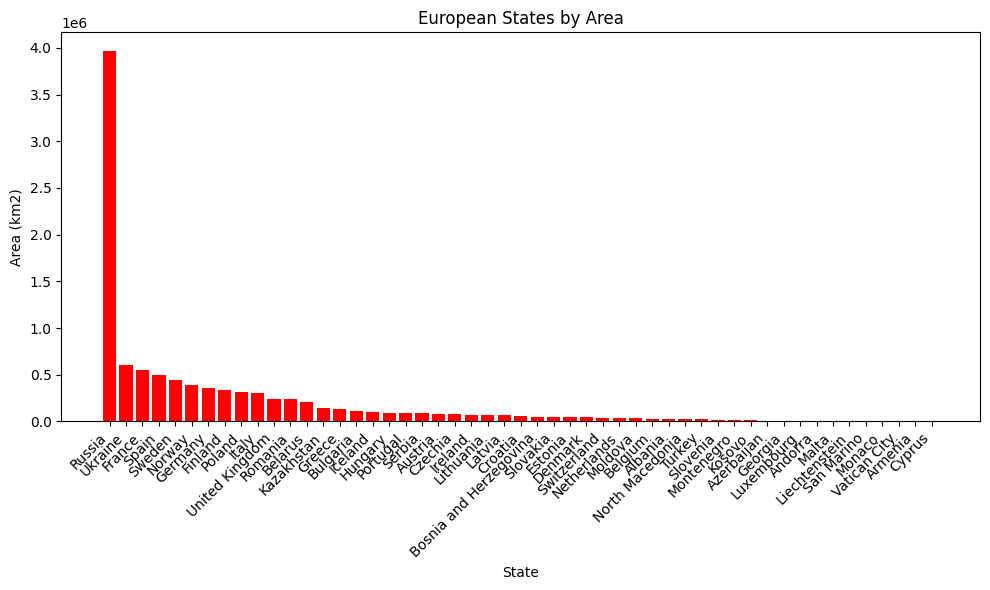

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(df['State'], df['Area (km2)'], color='red')
plt.xlabel('State')
plt.ylabel('Area (km2)')
plt.title(f'European States by Area')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

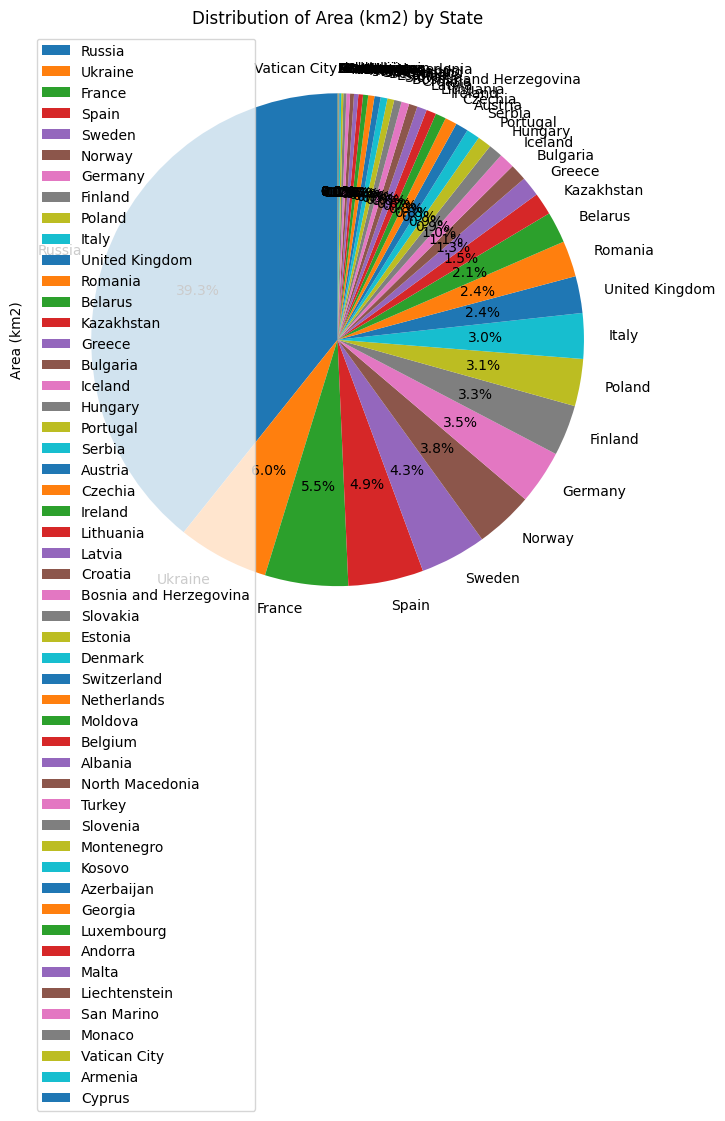

In [12]:
# Assuming df is your DataFrame with 'State' and 'Area (km2)' columns
df.plot.pie(y='Area (km2)', labels=df['State'], autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Distribution of Area (km2) by State')
plt.show()

In [13]:
df.to_csv('Europe_states_by_area.csv', index=False)

# Citation
Wikipedia contributors. "List of European countries by area." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 11 Nov. 2023. Web. 19 Nov. 2023.